## Final Project Submission

Please fill out:
* Student name: Giovanni Rosati
* Student pace: part-time
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL: TBD


In [1]:
### TO BE CLEANED UP

# imports & setup
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# from pandas.tools.plotting import scatter_matrix # data processing, scatter matrix 

# import statsmodels.api as sm # Python module that provides classes and functions for the estimation of 

# many different statistical models, as well as for conducting statistical tests, and statistical data exploration
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats
from scipy.stats import norm
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.formula.api as smf



#import xgboost as xgb
#from sklearn.model_selection import KFold
# from IPython.display import HTML, display
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

In [2]:
# import the dataset
initial_df = pd.read_csv("kc_house_data.csv")

In [3]:
initial_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
initial_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
nulls = initial_df.isnull().sum().sort_values(ascending=False)
nulls

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [7]:
# yr_renovated has some nulls, this likely indicates the house has never been officially renovated
# waterfront has nulls, posssibly meaning the house is not waterfront
# view has 63 nulls, possibly indicating wether or not the house has been viewed?

# looking closer at waterfront and view:
print("unique values in waterfront: {}".format(initial_df.waterfront.unique()))
print("unique values in view: {}".format(initial_df.view.unique()))

unique values in waterfront: [nan  0.  1.]
unique values in view: [ 0. nan  3.  4.  2.  1.]


In [8]:
# looking closer at view
np.unique(initial_df.view, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan]),
 array([19422,   330,   957,   508,   317,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1]))

In [9]:
# Because the waterfront null's represent more than 10% of the records, I will keep them.
# they will be retained as one of the bins for this factor.
# view is only 64 records out of over 20,000 so I will leave it as is for the moment. 


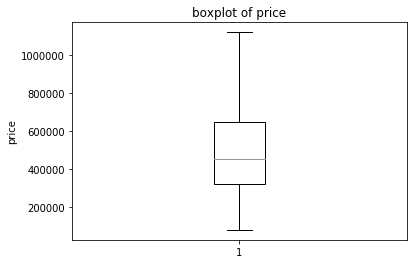

In [10]:
plt.boxplot(initial_df["price"], 0, '')
plt.title('boxplot of price')
plt.ylabel('price')
plt.show()

In [11]:
# The box plot appears reasonable, with a good chunk of the data in the middle area

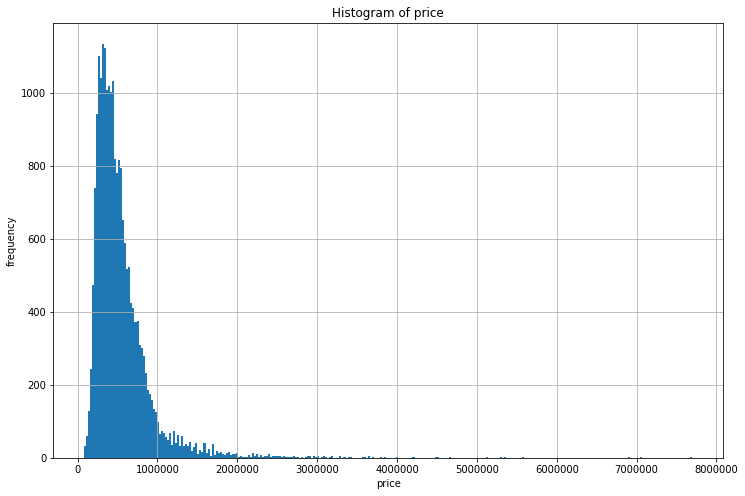

In [12]:
# create a histogram for price
fig = plt.figure(figsize = (12,8))
fig.add_subplot(111)

plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram of price')
initial_df.price.hist(bins=300)

plt.show()

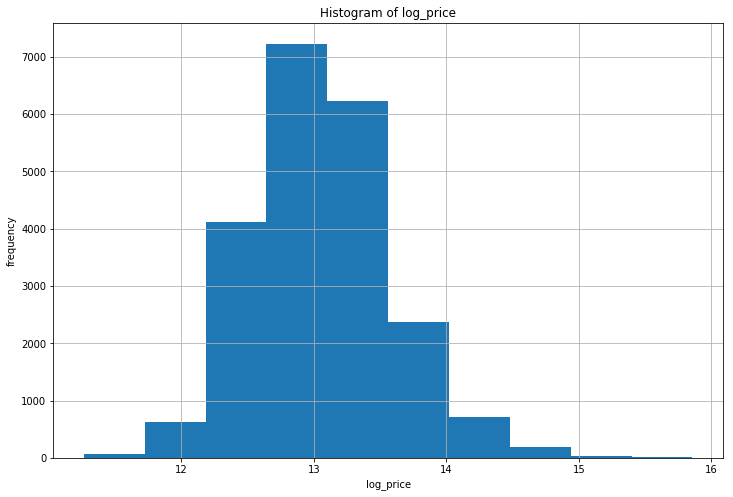

In [13]:
# there's clearly a long tail to the higher prices, with some extreme outliers.

# try converting price to a log scale and see how histogram looks
log_price = initial_df[initial_df['price']>0]
# walmart_log= walmart[walmart["Weekly_Sales"]>0]
log_price['price'] = np.log(log_price['price'])
# walmart_log["Weekly_Sales"]= np.log(walmart_log["Weekly_Sales"])

fig = plt.figure(figsize = (12,8))
fig.add_subplot(111)

plt.xlabel('log_price')
plt.ylabel('frequency')
plt.title('Histogram of log_price')
log_price.price.hist();


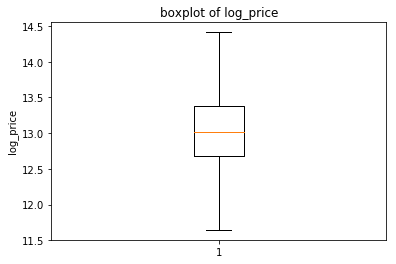

In [14]:
# boxplot of log_price
plt.boxplot(log_price["price"], 0, '')
plt.title('boxplot of log_price')
plt.ylabel('log_price')
plt.show()

In [15]:
# That's a much more "normal" looking distribution
# look at price_log
log_price.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,13.048211,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,0.526555,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,11.264464,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,12.682307,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,13.017003,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,13.377006,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,15.856731,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
# the following factors can be converted to categorical
# waterfront, view, condition, grade, zipcode, yr_built, yr_renovated
# what about these: bedrooms, bathrooms, floors,   ???
# cast all as strings first

# change date first
initial_df['date'] = pd.to_datetime(initial_df.date)
initial_df['weekday'] = initial_df['date'].dt.dayofweek.astype('str')
initial_df['month'] = initial_df['date'].dt.month.astype("str")

to_categorical = ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'yr_built', 'yr_renovated']

# also need to make sqft_basement into an int so it doesn't get converted to a categorical factor
initial_df['sqft_basement'] = pd.to_numeric(initial_df['sqft_basement'], errors='coerce').fillna(0).astype(np.int64)

for factor in to_categorical:
    initial_df[factor] = initial_df[factor].astype('str')

# initial_df = pd.get_dummies(initial_df, drop_first = True)
initial_df = pd.get_dummies(initial_df)


initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 315 entries, id to month_9
dtypes: datetime64[ns](1), float64(5), int64(8), uint8(301)
memory usage: 8.5 MB


In [17]:
# inspect all of the columns now, need to choose one column from each categorical factor to remove
list(initial_df)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_0.0',
 'waterfront_1.0',
 'waterfront_nan',
 'view_0.0',
 'view_1.0',
 'view_2.0',
 'view_3.0',
 'view_4.0',
 'view_nan',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1900',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_

In [20]:
# delete the following columns (choose version that has NaN or if no NaN, choose the first column of the group)
initial_df.drop(['waterfront_nan', 'view_nan', 'condition_1', 'grade_3', 'yr_built_1900', 'yr_renovated_nan',  'zipcode_98001',
  'weekday_0',  'month_1'], axis=1, inplace=True)

In [21]:
list(initial_df)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_0.0',
 'waterfront_1.0',
 'view_0.0',
 'view_1.0',
 'view_2.0',
 'view_3.0',
 'view_4.0',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_

In [22]:
norm.fit(log_price.price)

(13.048210941923953, 0.5265426376308636)

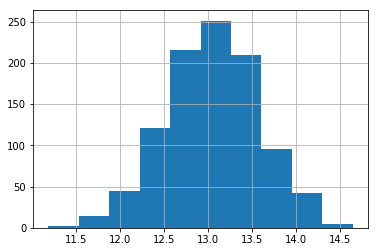

In [23]:
# look at a randomly created normal distribution with this mean and standard deviation
from numpy.random import normal
μ = 13.0482
σ = 0.5265
pd.Series(normal(loc=μ, scale=σ, size=1000)).hist();

/Users/giovanni/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


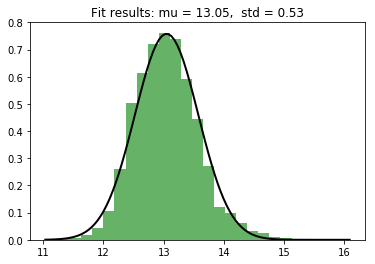

In [24]:
# from Eli's project
# Plot the histogram.
plt.hist(log_price.price, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title);

In [25]:
#   **********  START HERE


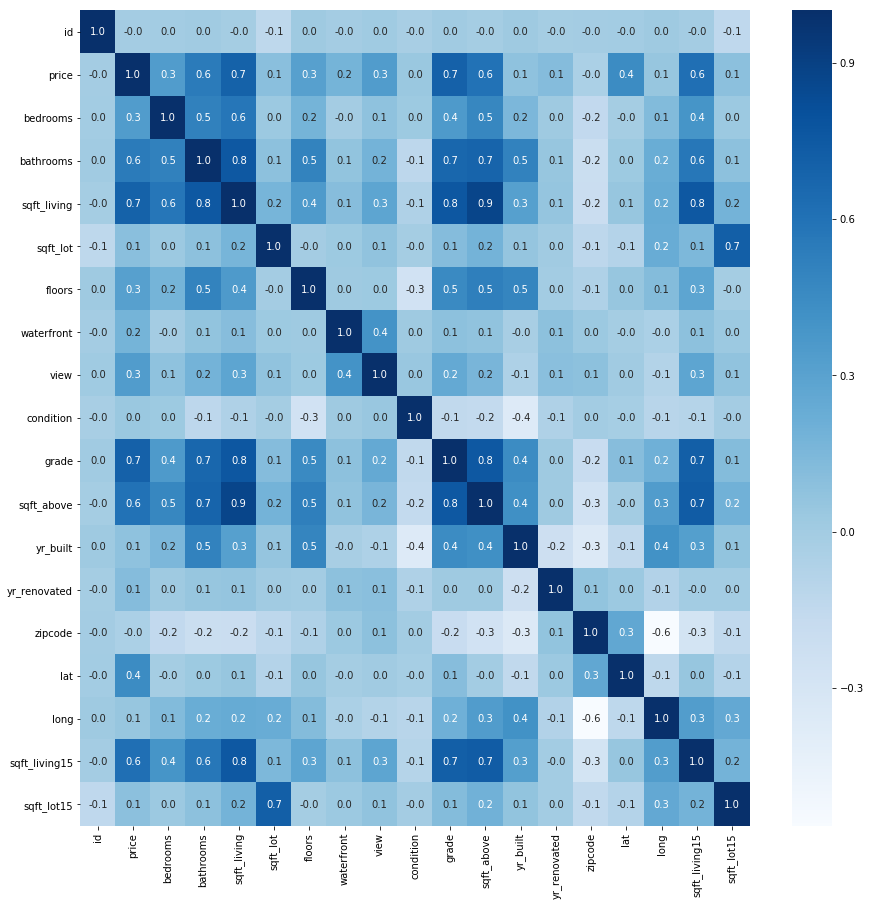

In [26]:
# look at a heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(log_price.corr(), annot=True, cmap="Blues", fmt= '.1f')
plt.show()

In [27]:
# the following factors already have a correlation to price at or above .6:
# * sqft_living15
# * sqft_above
# * grade
# * sqft_living
# * bathrooms


/Users/giovanni/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


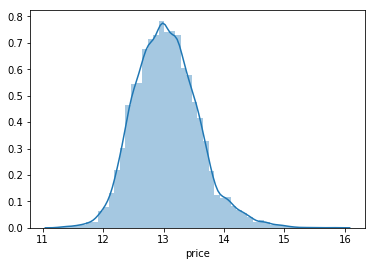

In [28]:
#Plotting a histogram using Seaborn - to check 
sns.distplot(log_price.price);

In [29]:
#Let us measure the house sales price curve characteristics: skewness and kurtosis
print("Skewness: %f" % log_price.price.skew())
print("Kurtosis: %f" % log_price.price.kurt())

Skewness: 0.431004
Kurtosis: 0.691049


In [30]:
#Scatterplot
#https://seaborn.pydata.org/examples/scatterplot_matrix.html
sns.set()
cols = ['sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms', 'lat']
sns.pairplot(log_price[cols], height = 3.5)
plt.show();

TypeError: pairplot() got an unexpected keyword argument 'height'

/Users/giovanni/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


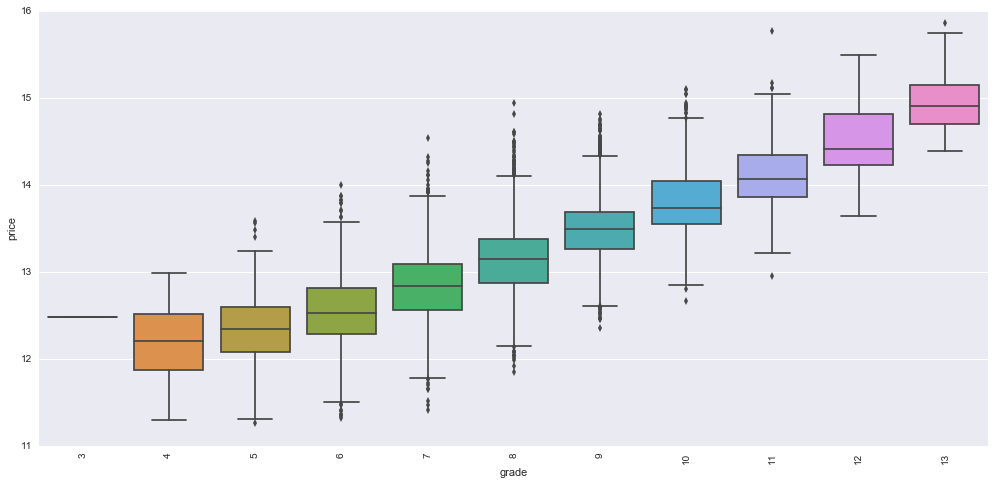

In [31]:
var = 'grade'
data = pd.concat([log_price.price, log_price[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

In [32]:
# grade seems to have a strong correlation to price, yet there are many outliers. 
# The box plot shows that the middle 50% of each grade shows a very consistent correlation to log_price.
# look at some more box plots


/Users/giovanni/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


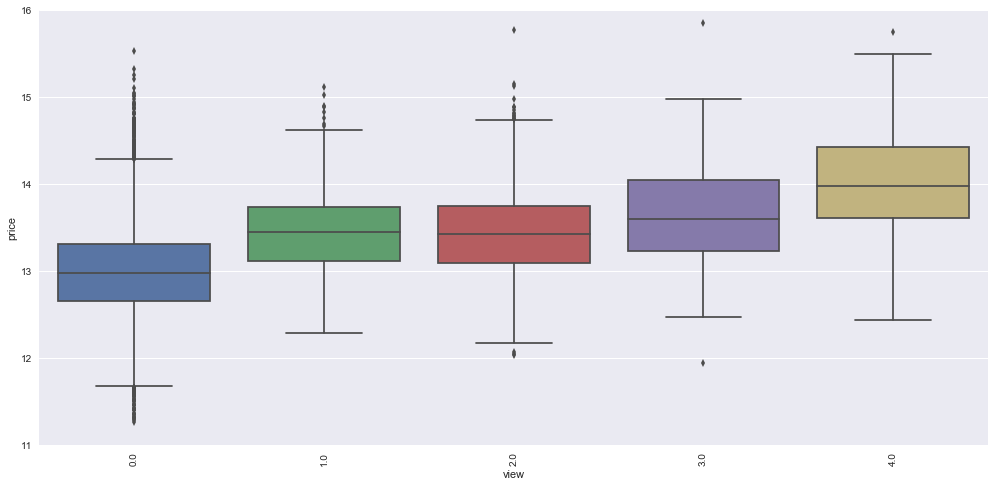

In [33]:
var = 'view'
data = pd.concat([log_price.price, log_price[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

/Users/giovanni/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


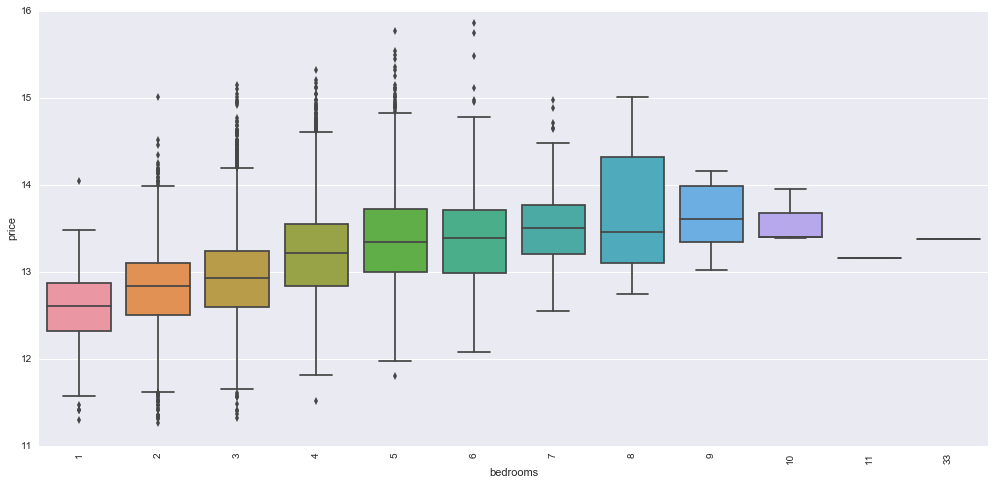

In [34]:
var = 'bedrooms'
data = pd.concat([log_price.price, log_price[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

/Users/giovanni/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


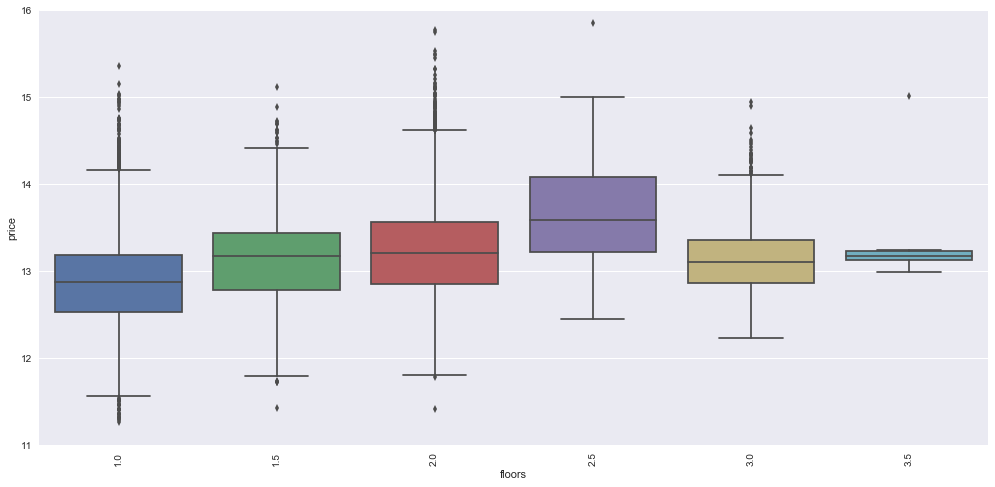

In [35]:
var = 'floors'
data = pd.concat([log_price.price, log_price[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);

In [36]:
# use the top 6 factors from the heatmap
col_names = ['sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms', 'lat']
# col_names = log_price.describe().columns.drop(['price'])
results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=log_price).fit()
    X_new = pd.DataFrame({val: [log_price[val].min(), log_price[val].max()]});
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results_log[idx+1])
    print("\n")

price~sqft_living15
------------------------------
['sqft_living15', 0.3835644204746945, 12.102755726015406, 0.0004759113794996623, 0.0]


price~sqft_above
------------------------------
['sqft_above', 0.3618975035607961, 12.363756506932534, 0.0003826767546828103, 0.0]


price~grade
------------------------------
['grade', 0.49522239530874357, 10.629508879817731, 0.31584340118574467, 0.0]


price~sqft_living
------------------------------
['sqft_living', 0.483282036851469, 12.218777442526873, 0.00039870441167294757, 0.0]


price~bathrooms
------------------------------
['bathrooms', 0.30387583204123636, 12.249565138197257, 0.37746284476776726, 0.0]


price~lat
------------------------------
['lat', 0.20145464913011768, -68.07831321648013, 1.7057688295092448, 0.0]




In [37]:
pd.DataFrame(results_log)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_living15,0.383564,12.1028,0.000475911,0
2,sqft_above,0.361898,12.3638,0.000382677,0
3,grade,0.495222,10.6295,0.315843,0
4,sqft_living,0.483282,12.2188,0.000398704,0
5,bathrooms,0.303876,12.2496,0.377463,0
6,lat,0.201455,-68.0783,1.70577,0


In [33]:
# create a new df using just these six factors and price
df_final = log_price.drop(['id','yr_renovated', 'waterfront', 'view', 'date', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'sqft_basement', 'yr_built', 'zipcode', 'long'], axis=1)
df_final.describe()

,price,sqft_living,grade,sqft_above,lat,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,13.048211,2080.321850,7.657915,1788.596842,47.560093,1986.620318,12758.283512
std,0.526555,918.106125,1.173200,827.759761,0.138552,685.230472,27274.441950
min,11.264464,370.000000,3.000000,370.000000,47.155900,399.000000,651.000000
25%,12.682307,1430.000000,7.000000,1190.000000,47.471100,1490.000000,5100.000000
50%,13.017003,1910.000000,7.000000,1560.000000,47.571800,1840.000000,7620.000000
75%,13.377006,2550.000000,8.000000,2210.000000,47.678000,2360.000000,10083.000000
max,15.856731,13540.000000,13.000000,9410.000000,47.777600,6210.000000,871200.000000


In [34]:
# create a matrix X and y containing the predictors and target for our model. 
y = df_final[['price']]
X = df_final.drop(['price'], axis=1)
X.head()

,sqft_living,grade,sqft_above,lat,sqft_living15,sqft_lot15
0,1180,7,1180,47.5112,1340,5650
1,2570,7,2170,47.7210,1690,7639
2,770,6,770,47.7379,2720,8062
3,1960,7,1050,47.5208,1360,5000
4,1680,8,1680,47.6168,1800,7503


In [35]:
# look at using 1-6 of these features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [36]:
r_list = []
adj_r_list = []
list_n = list(range(1,7,1))  # use, 1,2,3,4 and then 5 factors
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))  # some methods in sklearn require this format 
    # From Jeff:  y.values.reshape(-1,1)
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print('Using factor(s): ')
    print(selected_columns)
    print('r-squared:')
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('adjusted-r-squared:')
    print(adjusted_r_squared)
    print('----------------------')
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

Using factor(s): 
Index(['lat'], dtype='object')
r-squared:
price    0.201455
dtype: float64
adjusted-r-squared:
price    0.201233
dtype: float64
----------------------
Using factor(s): 
Index(['grade', 'lat'], dtype='object')
r-squared:
price    0.633097
dtype: float64
adjusted-r-squared:
price    0.632995
dtype: float64
----------------------
Using factor(s): 
Index(['sqft_living', 'grade', 'lat'], dtype='object')
r-squared:
price    0.703461
dtype: float64
adjusted-r-squared:
price    0.703379
dtype: float64
----------------------
Using factor(s): 
Index(['sqft_living', 'grade', 'lat', 'sqft_living15'], dtype='object')
r-squared:
price    0.708179
dtype: float64
adjusted-r-squared:
price    0.708098
dtype: float64
----------------------
Using factor(s): 
Index(['sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15'], dtype='object')
r-squared:
price    0.711022
dtype: float64
adjusted-r-squared:
price    0.710942
dtype: float64
----------------------
Using factor(s): 
Index(['

In [37]:
# try using MSE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

MSE_test = []
MSE_train = []
list_n = list(range(1,7,1))  # use, 1,2,3,4 and then 5 factors
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
    print ('MSE and adjusted MSE using {} features:'.format(n))
    print(mse_train)
    print(mse_test)
    print('----------------------')
MSE_test.append(mse_test)
MSE_train.append(mse_train)

MSE and adjusted MSE using 1 features:
price    0.221618
dtype: float64
price    0.220519
dtype: float64
----------------------
MSE and adjusted MSE using 2 features:
price    0.101805
dtype: float64
price    0.101402
dtype: float64
----------------------
MSE and adjusted MSE using 3 features:
price    0.082515
dtype: float64
price    0.081021
dtype: float64
----------------------
MSE and adjusted MSE using 4 features:
price    0.081397
dtype: float64
price    0.078988
dtype: float64
----------------------
MSE and adjusted MSE using 5 features:
price    0.080612
dtype: float64
price    0.078179
dtype: float64
----------------------
MSE and adjusted MSE using 6 features:
price    0.080609
dtype: float64
price    0.078153
dtype: float64
----------------------


In [38]:
# split data into 5 folds, train on 4, test on the one held out

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

selected_columns = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'lat']

cv_5_results = []
cv_5_results = cross_val_score(linreg, X[selected_columns], y, cv=5, scoring="neg_mean_squared_error")

# r-squared is also an option for scoring, as well as others
# neg_mean_squared_error * -1 = MSE

# cv_5_results
np.mean(cv_5_results)

-0.08029452391667594

In [39]:
# split data into 10 folds, train on 9, test on the remaining one

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

selected_columns = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'lat']

cv_10_results = []
cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

# r-squared is also an option for scoring, as well as others
# neg_mean_squared_error * -1 = MSE

# cv_10_results
np.mean(cv_10_results)

-0.08029919304653797

In [40]:
# looks like I will need to user more features and/or tune some features, 
# and or deal with theee categorical features
# asked fof feedback from Jeff - waiting

In [ ]:
# df_final['date'] = pd.to_datetime(initial_df.date)
# df_final['weekday'] = df_final['date'].dt.dayofweek
# #convert weekday to categorical data
# df_final['weekday'] = df_final['weekday'].astype("str")
# # create categorical factors for weekday
# df_final = pd.get_dummies(df_final)

# # create a month factor, then make it categorical
# df_final['month'] = df_final['date'].dt.month
# df_final['month'] = df_final['month'].astype("str")
# df_final = pd.get_dummies(df_final)


In [ ]:
# do a heatmap of these factors
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_final.corr(), annot=True, cmap="Blues", fmt= '.1f')
plt.show()